#Business Case : Yulu - Hypothesis Testing

##About Yulu
Yulu is a technology-driven mobility platform that aims to solve first and last-mile connectivity challenges in cities using a fleet of electric two-wheelers. The company offers a convenient and eco-friendly mode of transportation through dockless e-bikes and e-scooters that can be rented via a smartphone app.

Yulu zones are located at all the appropriate locaƟons (including metro staƟons, bus stands, office
spaces, residenƟal areas, corporate offices, etc) to make those first and last miles smooth, affordable,
and convenient!


##Objective
The company wants to know:

- Which variables are significant in predicting the demand for shared electric cycles in the
Indian market?
- How well those variables describe the electric cycle demands.


In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import kruskal
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

In [ ]:
!wget "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089" -O yulu_data.csv

--2024-04-25 15:19:45--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 3.162.130.189, 3.162.130.97, 3.162.130.14, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|3.162.130.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘yulu_data.csv’

yulu_data.csv       100%[===================>] 633.16K  --.-KB/s    in 0.01s   

2024-04-25 15:19:45 (42.6 MB/s) - ‘yulu_data.csv’ saved [648353/648353]



In [ ]:
df = pd.read_csv("yulu_data.csv")
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
#changing the datatype of datetime column into datetime
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.weekday
# 0 = monday, 1=Tuesday ...
df['hour'] = df['datetime'].dt.hour
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


In [ ]:
df.describe(include = 'all').T

,count,mean,min,25%,50%,75%,max,std
datetime,10886,2011-12-27 05:56:22.399411968,2011-01-01 00:00:00,2011-07-02 07:15:00,2012-01-01 20:30:00,2012-07-01 12:45:00,2012-12-19 23:00:00,NaN
season,10886.0,2.506614,1.0,2.0,3.0,4.0,4.0,1.116174
holiday,10886.0,0.028569,0.0,0.0,0.0,0.0,1.0,0.166599
workingday,10886.0,0.680875,0.0,0.0,1.0,1.0,1.0,0.466159
weather,10886.0,1.418427,1.0,1.0,1.0,2.0,4.0,0.633839
temp,10886.0,20.23086,0.82,13.94,20.5,26.24,41.0,7.79159
atemp,10886.0,23.655084,0.76,16.665,24.24,31.06,45.455,8.474601
humidity,10886.0,61.88646,0.0,47.0,62.0,77.0,100.0,19.245033
windspeed,10886.0,12.799395,0.0,7.0015,12.998,16.9979,56.9969,8.164537
casual,10886.0,36.021955,0.0,4.0,17.0,49.0,367.0,49.960477


In [ ]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
dtype: int64

In [ ]:
df.duplicated().sum()

0

##Insights
- There are no missing values in the dataset.
- **casual** and **registered** attributes might have outliers because their mean and median are very far away to one another and the value of standard deviation is also high which tells us that there is high variance in the data of these attributes.


Checking the unique values in some columns

In [ ]:
df['datetime'].nunique()

10886

In [ ]:
df['season'].unique()

array([1, 2, 3, 4])

there are 4 categorical values in the column 'season'

In [ ]:
df['holiday'].unique()

array([0, 1])

In [ ]:
df['workingday'].unique()

array([0, 1])

In [ ]:
df['weather'].unique()

array([1, 2, 3, 4])

In [ ]:
df['temp'].unique()

array([ 9.84,  9.02,  8.2 , 13.12, 15.58, 14.76, 17.22, 18.86, 18.04,
       16.4 , 13.94, 12.3 , 10.66,  6.56,  5.74,  7.38,  4.92, 11.48,
        4.1 ,  3.28,  2.46, 21.32, 22.96, 23.78, 24.6 , 19.68, 22.14,
       20.5 , 27.06, 26.24, 25.42, 27.88, 28.7 , 30.34, 31.16, 29.52,
       33.62, 35.26, 36.9 , 32.8 , 31.98, 34.44, 36.08, 37.72, 38.54,
        1.64,  0.82, 39.36, 41.  ])

In [ ]:
df['atemp'].unique()

array([14.395, 13.635, 12.88 , 17.425, 19.695, 16.665, 21.21 , 22.725,
       21.97 , 20.455, 11.365, 10.605,  9.85 ,  8.335,  6.82 ,  5.305,
        6.06 ,  9.09 , 12.12 ,  7.575, 15.91 ,  3.03 ,  3.79 ,  4.545,
       15.15 , 18.18 , 25.   , 26.515, 27.275, 29.545, 23.485, 25.76 ,
       31.06 , 30.305, 24.24 , 18.94 , 31.82 , 32.575, 33.335, 28.79 ,
       34.85 , 35.605, 37.12 , 40.15 , 41.665, 40.91 , 39.395, 34.09 ,
       28.03 , 36.365, 37.88 , 42.425, 43.94 , 38.635,  1.515,  0.76 ,
        2.275, 43.18 , 44.695, 45.455])

In [ ]:
df['humidity'].unique()

array([ 81,  80,  75,  86,  76,  77,  72,  82,  88,  87,  94, 100,  71,
        66,  57,  46,  42,  39,  44,  47,  50,  43,  40,  35,  30,  32,
        64,  69,  55,  59,  63,  68,  74,  51,  56,  52,  49,  48,  37,
        33,  28,  38,  36,  93,  29,  53,  34,  54,  41,  45,  92,  62,
        58,  61,  60,  65,  70,  27,  25,  26,  31,  73,  21,  24,  23,
        22,  19,  15,  67,  10,   8,  12,  14,  13,  17,  16,  18,  20,
        85,   0,  83,  84,  78,  79,  89,  97,  90,  96,  91])

In [ ]:
df['windspeed'].unique()

array([ 0.    ,  6.0032, 16.9979, 19.0012, 19.9995, 12.998 , 15.0013,
        8.9981, 11.0014, 22.0028, 30.0026, 23.9994, 27.9993, 26.0027,
        7.0015, 32.9975, 36.9974, 31.0009, 35.0008, 39.0007, 43.9989,
       40.9973, 51.9987, 46.0022, 50.0021, 43.0006, 56.9969, 47.9988])

In [ ]:
#changing the 'season', 'holiday', 'workingday' and 'weather' columns into category
cols = ['season','holiday','workingday','weather']
for i in cols :
  df[i] = df[i].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
dtypes: datetime64[ns](1), 

In [ ]:
df.describe(include = 'object').T

,count,unique,top,freq
season,10886,4,4,2734
holiday,10886,2,0,10575
workingday,10886,2,1,7412
weather,10886,4,1,7192


In [ ]:
#value counts
df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [ ]:
df['holiday'].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

The number of non-holidays is 10575 and holidays are 311

In [ ]:
df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

In [ ]:
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [ ]:
df['humidity'].value_counts()

humidity
88    368
94    324
83    316
87    289
70    259
     ... 
8       1
10      1
97      1
96      1
91      1
Name: count, Length: 89, dtype: int64

In [ ]:
df['casual'].value_counts()

casual
0      986
1      667
2      487
3      438
4      354
      ... 
332      1
361      1
356      1
331      1
304      1
Name: count, Length: 309, dtype: int64

In [ ]:
df['registered'].value_counts()

registered
3      195
4      190
5      177
6      155
2      150
      ... 
570      1
422      1
678      1
565      1
636      1
Name: count, Length: 731, dtype: int64

##Univariate Analysis

Analyzing the distribution of Numerical & Categorical variables, separately


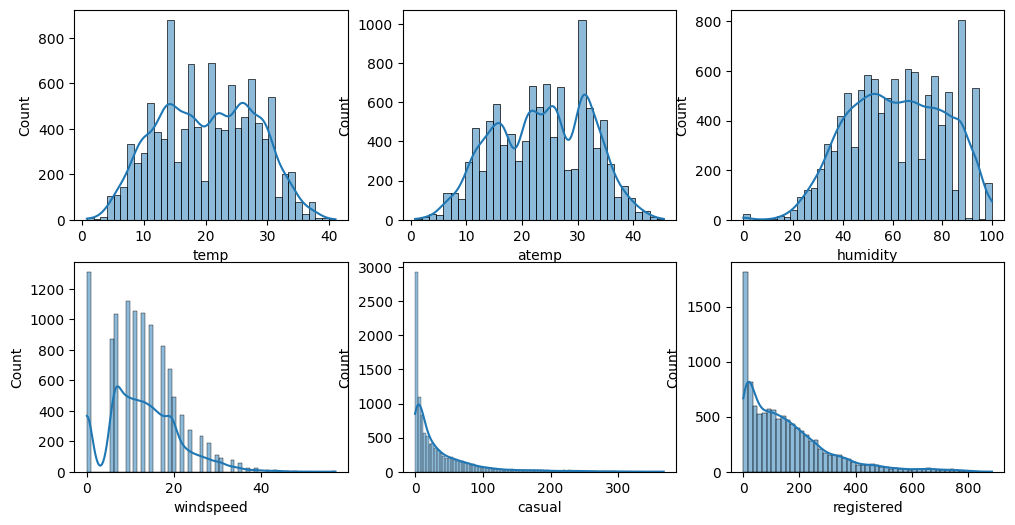

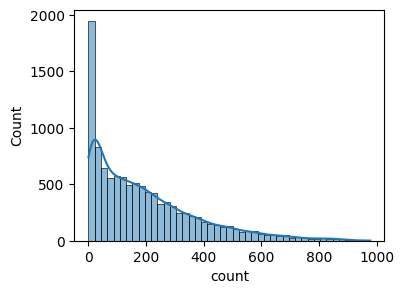

In [ ]:
#distribution of numerical columns
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual','registered','count']
fig, axis = plt.subplots(nrows = 2,ncols = 3, figsize = (12,6))

index = 0
for rows in range(2) :
  for cols in range(3) :
    sns.histplot(data = df[num_cols[index]] ,ax = axis[rows,cols], kde = True)
    index += 1
plt.show()
plt.figure(figsize = (4,3))
sns.histplot(data=df, x = 'count',kde = True)
plt.show()

##Insights
- casual, registered and count somewhat looks like Log Normal
Distribution
- temp, atemp and humidity looks like they follows the Normal Distribution
- windspeed follows the binomial distribution

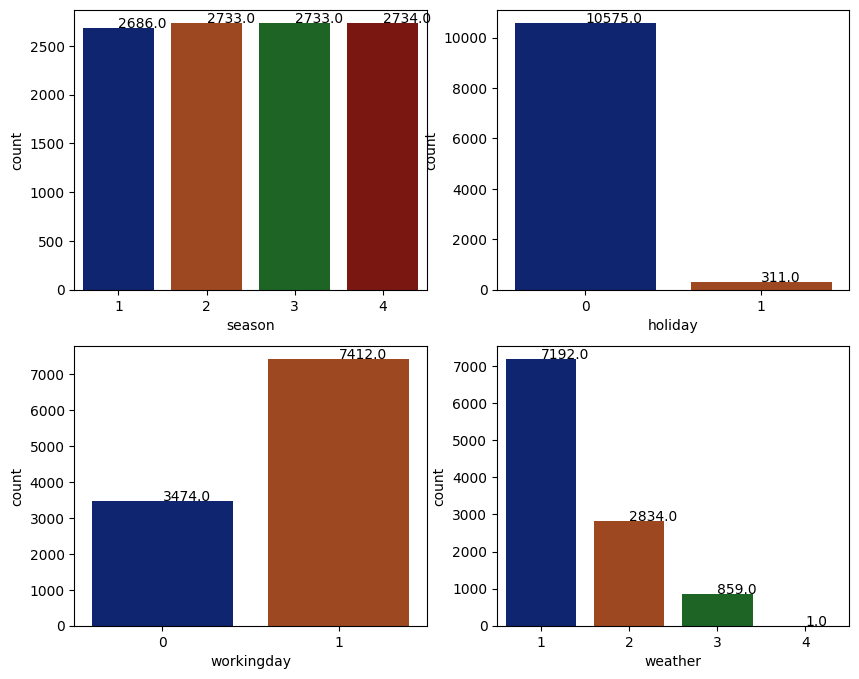

In [ ]:
#distribution of categorical columns
cat_cols = ['season','holiday','workingday','weather']
fig, axis = plt.subplots(nrows = 2,ncols = 2, figsize=(10,8))
index = 0
for row in range(2) :
  for col in range(2) :
    ax = sns.countplot(data=df, x = cat_cols[index], ax=axis[row,col],palette = 'dark')
    for p in ax.patches:
      ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), )
    index +=1

##Insights
Data looks common as it should be like equal number of days in each season, more working
days and weather is mostly Clear, Few clouds, partly cloudy, partly cloudy.


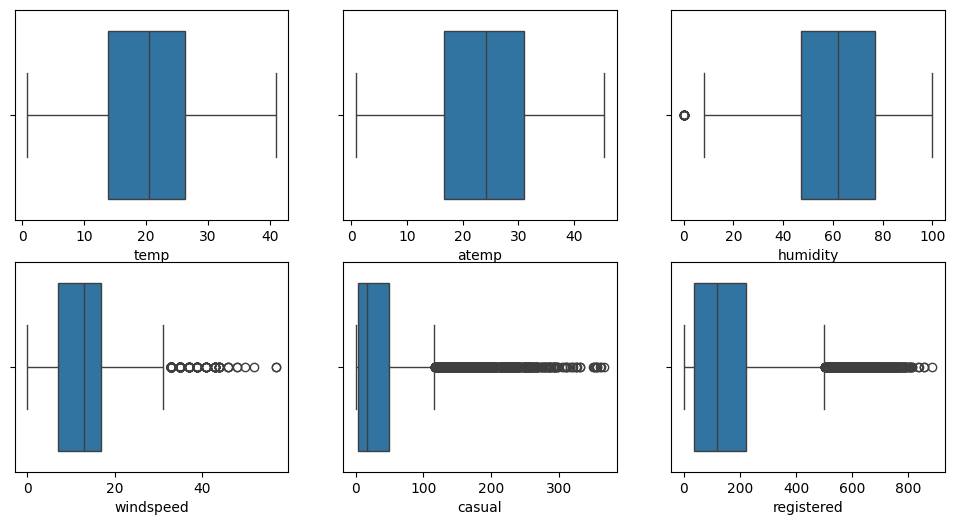

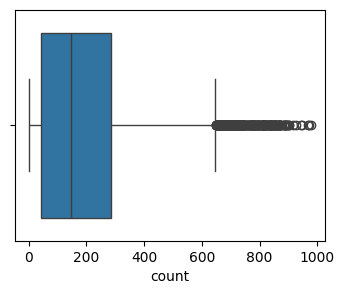

In [ ]:
#to find the outliers in the numerical columns
fig, axis = plt.subplots(nrows = 2,ncols = 3, figsize = (12,6))

index = 0
for rows in range(2) :
  for cols in range(3) :
    sns.boxplot(data = df, x = df[num_cols[index]] ,ax = axis[rows,cols])
    index += 1
plt.show()
plt.figure(figsize = (4,3))
sns.boxplot(data=df, x = 'count')
plt.show()

##Insights
humidity, casual, registered and count have outliers in the data

In [ ]:
#removing outliers before 5th percentile and after 95th percentile
def clipped_data(data) :
  percentile_5 = np.percentile(data,5)
  print(percentile_5)
  percentile_95 = np.percentile(data,95)
  print(percentile_95)
  clipped_data=np.clip(a=data,a_min=percentile_5,a_max=percentile_95)
  return clipped_data

0.0
27.9993
0.0
141.0
4.0
464.0
5.0
563.75


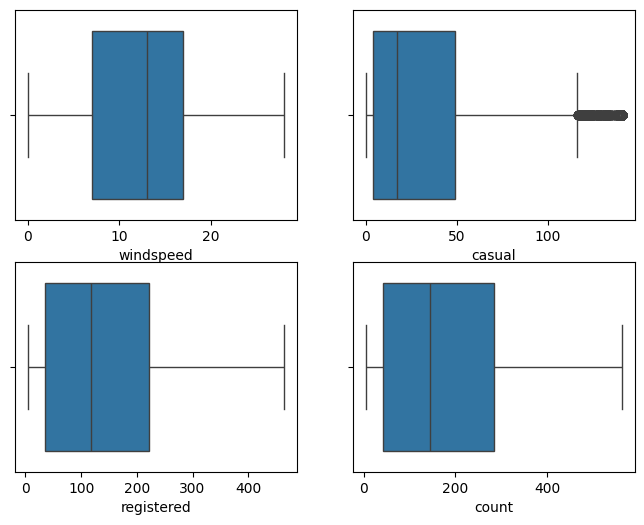

In [ ]:
list = [clipped_data(df['windspeed']),clipped_data(df['casual']),clipped_data(df['registered']),clipped_data(df['count'])]
fig, axis = plt.subplots(nrows = 2,ncols = 2,figsize = (8,6))
index = 0
for row in range(2) :
  for col in range(2) :
    sns.boxplot(data = df ,x = list[index], ax = axis[row,col])
    index += 1

Establishing a Relationship between the Dependent and Independent Variables.

In [ ]:
correlation_matrix = df[num_cols].corr()
correlation_matrix

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


<Axes: >

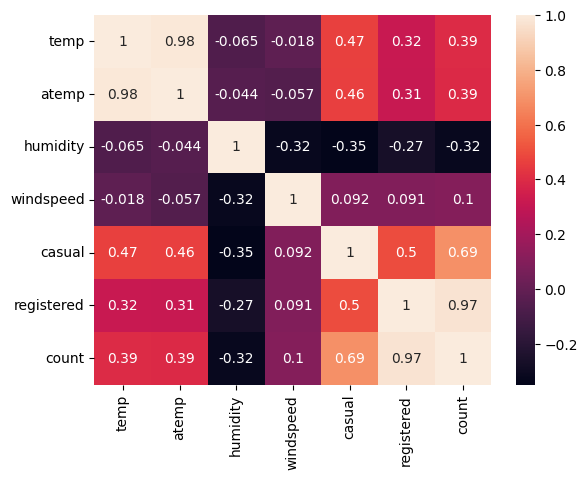

In [ ]:
sns.heatmap(data=correlation_matrix, annot = True)

In [ ]:
threshold = 0.8  # Define correlation threshold (e.g., 0.8)
correlated_features = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.append(colname)
print(correlated_features)

['atemp', 'count']


atemp and count are two highly correlated vairables

##Bivariate analysis

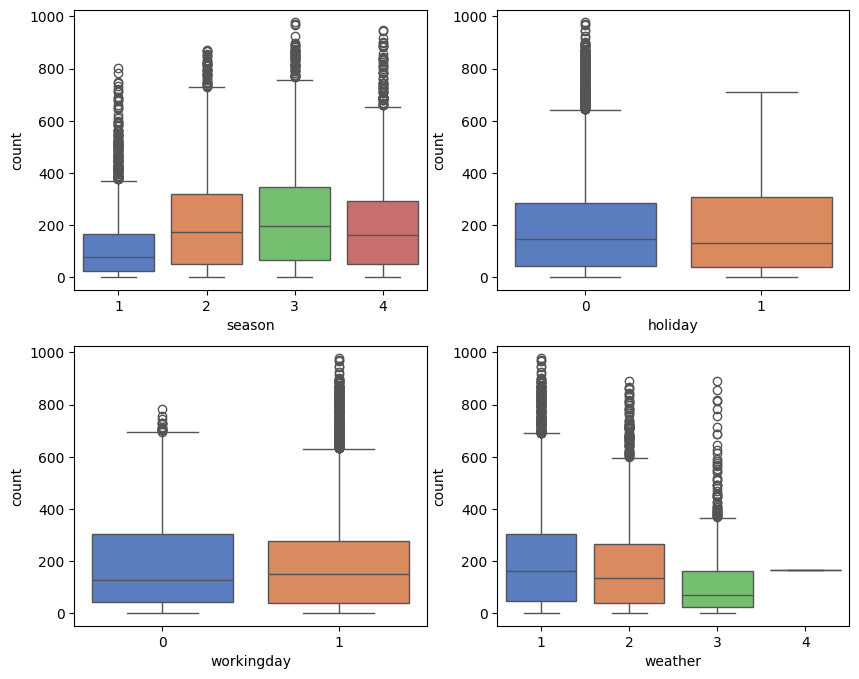

In [ ]:
# plotting categorical variables againt count using boxplots

cat_cols = ['season','holiday','workingday','weather']
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
index = 0
for row in range(2):
  for col in range(2):
    sns.boxplot(data=df, x=cat_cols[index], y='count', ax=axis[row,col],palette = 'muted')
    index += 1

plt.show()


##Insights
- In summer and fall seasons more bikes are rented as compared to other seasons.
- Whenever its a holiday more bikes are rented.
- It is also clear from the workingday column, whenever day is holiday or weekend, slightly more bikes were rented.
- Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented

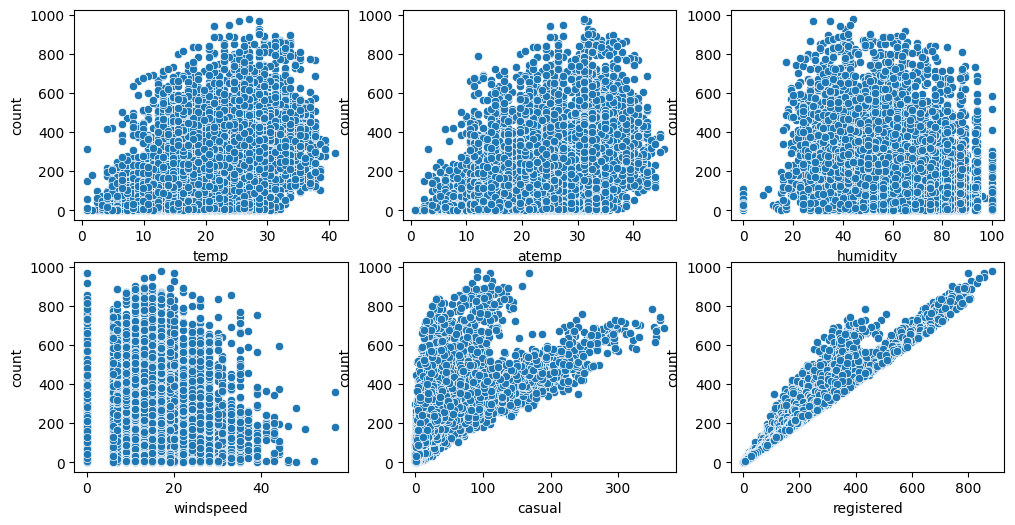

In [ ]:
# plotting numerical variables againt count using scatterplot
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual','registered']
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
index = 0
for row in range(2):
  for col in range(3):
    sns.scatterplot(data=df, x=num_cols[index], y='count',ax=axis[row, col])
    index += 1

plt.show()

##Insights
- Whenever the humidity is less than 20, number of bikes rented is very very low.
- Whenever the temperature is less than 10, number of bikes rented is less.
- Whenever the windspeed is greater than 35, number of bikes rented is less.


To check if there is any significant difference between the no. of bike rides on Weekdays and Weekends?

2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented.

Assumptions of T-Test

1. The sample size should be less than 30.
2. The population variance is unknown.
3. The population mean and standard deviation are finite.
4. The means of the two populations being compared should follow normal distributions.
5. If using Student's original definition of the t-test, the two populations being compared should have the same variance. If the sample sizes in the two groups being compared are equal, Student's original t-test is highly robust to the presence of unequal variances.

In [ ]:
'''
Weekdays are : Monday, Tuesday, Wednesday, Thursday, Friday
Weekends are : Saturday, Sunday
we perform a 2 sample Independent T test.
'''

#H0 : There is no significant difference between no. of bikerides on weekdays and weekends
#H1 : There is significant difference between no. of bikerides on weekdays and weekends


'\nWeekdays are : Monday, Tuesday, Wednesday, Thursday, Friday\nWeekends are : Saturday, Sunday\n'

In [ ]:
df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

Weekdays are 7412 and Weekends are 3474

In [ ]:
#Bike rides on weekdays and weekeends
weekday_rides = df[df['workingday'] == 1]['count']
weekend_rides = df[df['workingday'] == 0]['count']

In [ ]:
alpha = 0.05   #significant level
stat, p_value = ttest_ind(weekday_rides, weekend_rides)
print("The statistic values is",stat)
print("The p value is ",p_value)
if p_value < alpha :
  print("Reject H0 :There is a significant difference between number of bike rides on weekdays and weekends")
else :
  print("Fail to reject H0 : There is no significant difference between number of bike rides on weekdays and weekends")

The statistic values is 1.2096277376026694
The p value is  0.22644804226361348
Fail to reject H0 : There is no significant difference between number of bike rides on weekdays and weekends


##To check if the demand of bicycles on rent is the same for different Weather conditions

In [ ]:
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

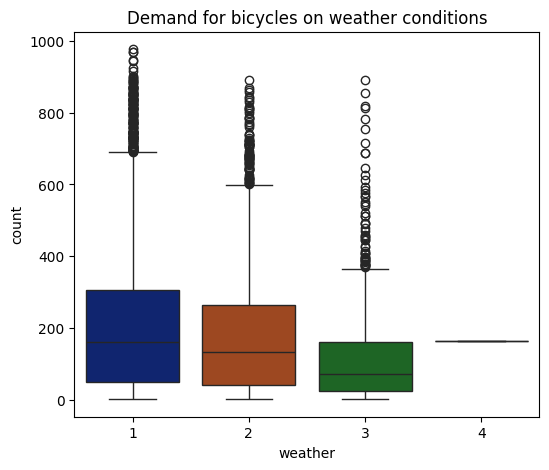

In [ ]:
plt.figure(figsize = (6,5))
sns.boxplot(data=df, x = 'weather', y='count',palette = 'dark')
plt.title("Demand for bicycles on weather conditions")
plt.show()


In [ ]:
#H0 : The demand of bicycles on rent is the same for different Weather conditions
#H1 : The demand of bicycles on rent is not same for different Weather conditions

'''
We will use a one-way ANOVA test because we want to compare means across more than two groups (different weather conditions)..

1: Clear, Few clouds, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog

'''
#significance level
alpha = 0.05

We have to check 3 assumptions :

- Normality (Histograms, QQ plot and Shapiro-Wilk's test)

- Equality of variances (Levene's test)

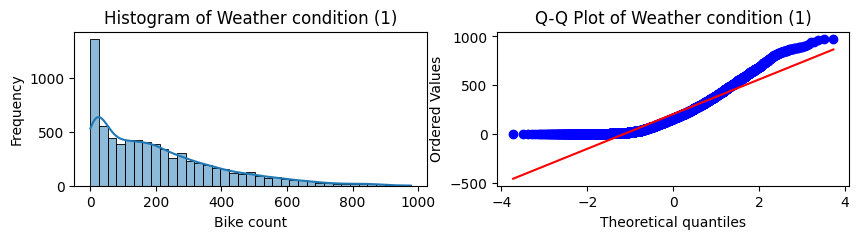

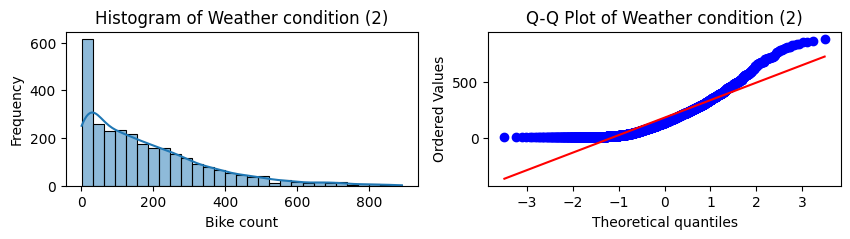

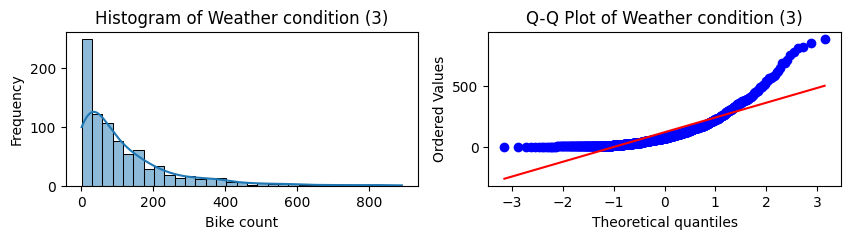

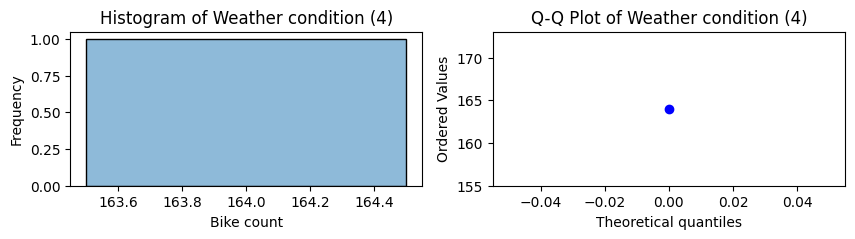

In [ ]:
#Normality
for i in [1,2,3,4] :
  group = df[df['weather'] == i]['count']
  #plotting histogram and QQ plots
  plt.figure(figsize=(10, 2))
  plt.subplot(1, 2, 1)
  sns.histplot(group, kde=True)
  plt.title(f'Histogram of Weather condition ({i})')
  plt.xlabel("Bike count")
  plt.ylabel("Frequency")

  plt.subplot(1, 2, 2)
  stats.probplot(group, dist="norm", plot=plt)
  plt.title(f'Q-Q Plot of Weather condition ({i})')
  plt.show()

From the above graphs we can see that the groups does not follow Gaussian distribution

The Shapiro - Wilk test also fails because the 4th weather condition lacks the minimum requirement to have a sample size of 3 (requires a random sample of between 3 and 2,000 for the Shapiro-Wilk test)

The data is Independent

To test the Equivalency of Variance we use Levene's test

In [ ]:
#H0 : The variances of group are equal
#H1 : The variances of group are not equal

gp_1 = df[df['weather'] == 1]['count']
gp_2 = df[df['weather'] == 2]['count']
gp_3 = df[df['weather'] == 3]['count']
gp_4 = df[df['weather'] == 4]['count']

stat, p_value = levene(gp_1,gp_2,gp_3,gp_4)
print("Statistic value is ",stat)
print("P value is ",p_value)

if p_value < 0.05 :
  print("Reject H0 : The variances of group are not equal")
else :
  print("Fail to reject H0 : The variances of group are equal")

Statistic value is  54.85106195954556
P value is  3.504937946833238e-35
Reject H0 : The variances of group are not equal


In [ ]:
print("variance of group 1 is ",gp_1.var())
print("variance of group 2 is ",gp_2.var())
print("variance of group 3 is ",gp_3.var())
print("variance of group 4 is ",gp_4.var())

variance of group 1 is  35328.79846268022
variance of group 2 is  28347.248993301797
variance of group 3 is  19204.77589271419
variance of group 4 is  nan


Hence the assumptions of ANOVA test is failed, hence we perform the Kruskal's test

In [ ]:
#Kruskal's test

gp_1 = df[df['weather'] == 1]['count']
gp_2 = df[df['weather'] == 2]['count']
gp_3 = df[df['weather'] == 3]['count']
gp_4 = df[df['weather'] == 4]['count']

stat, p_value = kruskal(gp_1, gp_2, gp_3, gp_4)
print("Test statistic value is",stat)
print("P value is ",p_value)
if p_value < 0.05 :
  print("Reject H0 : The demand of bicycles on rent is not same for different Weather conditions")
else :
  print("Fail to reject H0 : The demand of bicycles on rent is the same for different Weather conditions")

Test statistic value is 205.00216514479087
P value is  3.501611300708679e-44
Reject H0 : The demand of bicycles on rent is not same for different Weather conditions


##To check if the demand of bicycles on rent is the same for different Seasons

In [ ]:
df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

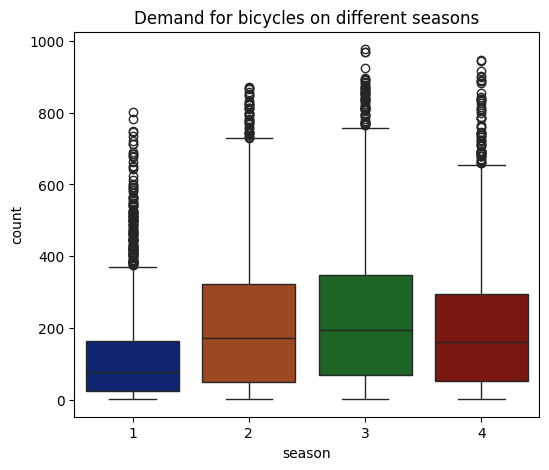

In [ ]:
plt.figure(figsize = (6,5))
sns.boxplot(data=df, x = 'season', y='count',palette = 'dark')
plt.title("Demand for bicycles on different seasons")
plt.show()

In [ ]:
#H0 : The demand of bicycles on rent is the same for different seasons
#H1 : The demand of bicycles on rent is not same for different seasons

'''
We will use a one-way ANOVA test because we want to compare means across more than two groups (different seasons)..

season
1: spring
2: summer
3: fall
4: winter

'''
#significance level
alpha = 0.05

We have to check 3 assumptions :

- Normality (Histograms, QQ plot and Shapiro-Wilk's test)

- Equality of variances (Levene's test)

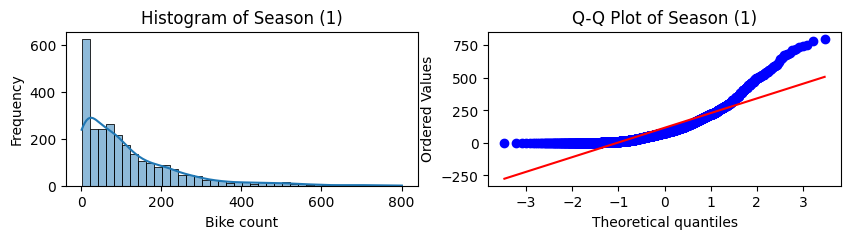

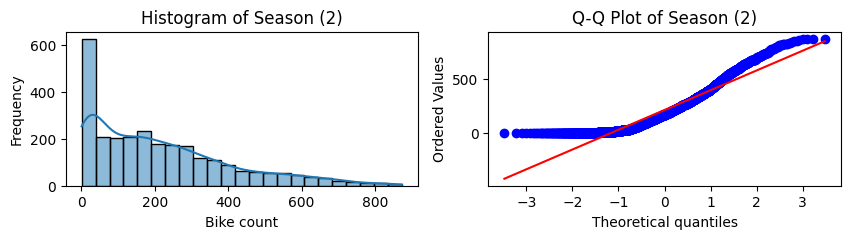

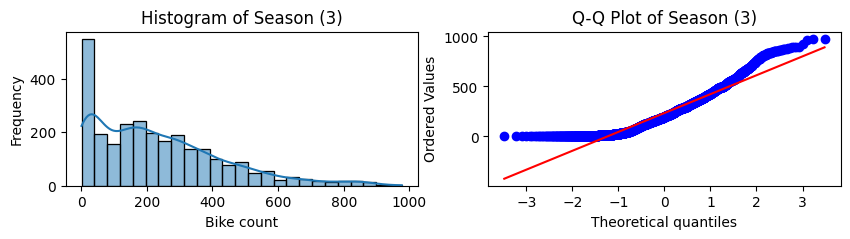

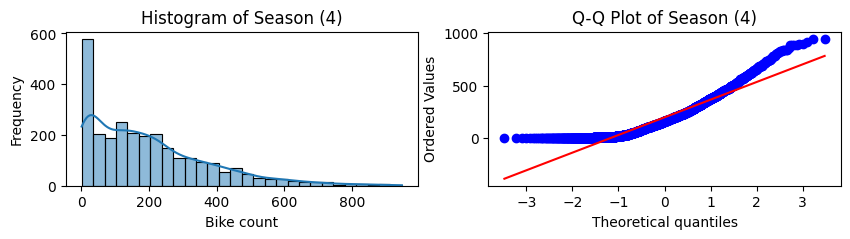

In [ ]:
#Normality
for i in [1,2,3,4] :
  group = df[df['season'] == i]['count']
  #plotting histogram and QQ plots
  plt.figure(figsize=(10, 2))
  plt.subplot(1, 2, 1)
  sns.histplot(group, kde=True)
  plt.title(f'Histogram of Season ({i})')
  plt.xlabel("Bike count")
  plt.ylabel("Frequency")

  plt.subplot(1, 2, 2)
  stats.probplot(group, dist="norm", plot=plt)
  plt.title(f'Q-Q Plot of Season ({i})')
  plt.show()

From the above graphs we can see that the groups does not follow Gaussian distribution

In [ ]:
#Shapro - Wilks test
values = df['season']
values

0        1
1        1
2        1
3        1
4        1
        ..
10881    4
10882    4
10883    4
10884    4
10885    4
Name: season, Length: 10886, dtype: object

In [ ]:
sample = values.sample(100)
stat, p_value = shapiro(sample)
print("Test statistic value is",stat)
print("P value is ",p_value)
if p_value < 0.05 :
  print("Reject H0 : The demand of bicycles on rent is not same for different seasons")
else :
  print("Fail to reject H0 : The demand of bicycles on rent is the same for different seasons")

Test statistic value is 0.8360135555267334
P value is  3.730646458421916e-09
Reject H0 : The demand of bicycles on rent is not same for different seasons


Equivalence of Variance


In [ ]:
#creating groups
gp_1 = df[df['season'] == 1]['count']
gp_2 = df[df['season'] == 2]['count']
gp_3 = df[df['season'] == 3]['count']
gp_4 = df[df['season'] == 4]['count']

In [ ]:
print("variance of group 1 is ",gp_1.var())
print("variance of group 2 is ",gp_2.var())
print("variance of group 3 is ",gp_3.var())
print("variance of group 4 is ",gp_4.var())

variance of group 1 is  15693.568533717144
variance of group 2 is  36867.01182553242
variance of group 3 is  38868.517012662865
variance of group 4 is  31549.720316669307


In [ ]:
#performing levene's test to check the equivalency of variances

#H0 : The variances of group are equal
#H1 : The variances of group are not equal

stat, p_value = levene(gp_1,gp_2,gp_3,gp_4)
print("Test statistic value is ",stat)
print("P value is ",p_value)

if p_value < 0.05 :
  print("Reject H0 : The variances of group are not equal")
else :
  print("Fail to reject H0 : The variances of group are equal")

Test statistic value is  187.7706624026276
P value is  1.0147116860043298e-118
Reject H0 : The variances of group are not equal


Hence the assumptions of ANOVA test is failed, hence we perform the Kruskal's test

In [ ]:
#Kruskal's test

gp_1 = df[df['season'] == 1]['count']
gp_2 = df[df['season'] == 2]['count']
gp_3 = df[df['season'] == 3]['count']
gp_4 = df[df['season'] == 4]['count']

stat, p_value = kruskal(gp_1, gp_2, gp_3, gp_4)
print("Test statistic value is",stat)
print("P value is ",p_value)
if p_value < 0.05 :
  print("Reject H0 : The demand of bicycles on rent is not same for different Seasons")
else :
  print("Fail to reject H0 : The demand of bicycles on rent is the same for different Seasons")

Test statistic value is 699.6668548181988
P value is  2.479008372608633e-151
Reject H0 : The demand of bicycles on rent is not same for different Seasons


In [ ]:
#oneway ANOVA test

gp_1 = df[df['season'] == 1]['count']
gp_2 = df[df['season'] == 2]['count']
gp_3 = df[df['season'] == 3]['count']
gp_4 = df[df['season'] == 4]['count']

stat, p_value = f_oneway(gp_1, gp_2, gp_3, gp_4)
print("Test statistic value is",stat)
print("P value is ",p_value)
if p_value < 0.05 :
  print("Reject H0 : The demand of bicycles on rent is not same for different Seasons")
else :
  print("Fail to reject H0 : The demand of bicycles on rent is the same for different Seasons")

Test statistic value is 236.94671081032106
P value is  6.164843386499654e-149
Reject H0 : The demand of bicycles on rent is not same for different Seasons


##To check if the Weather conditions are significantly different during different Seasons

In [ ]:
#H0 : The Weather conditions are independent of different Season
#H1 : The Weather conditions are dependent of different Season

#Here we will perform the chisquare Test of independence (i.e) chi2_contingency

alpha = 0.05

In [ ]:
#creating a crosstab between Weather and Season

ws = pd.crosstab(df['weather'], df['season'])
ws

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [ ]:
stat, p_value, dof, expected = chi2_contingency(ws)
print("The test statitstic value is",stat)
print()
print("P values is",p_value)
print()
print("The degree of freedom is",dof)
print()
if p_value < 0.05 :
  print("Reject H0 : The Weather conditions are dependent of different Season")
else :
  print("Fail to reject H0 : The Weather conditions are independent of different Season")

The test statitstic value is 49.15865559689363

P values is 1.5499250736864862e-07

The degree of freedom is 9

Reject H0 : The Weather conditions are dependent of different Season


#Business Insights
- Maximum bike rentals occur during summer, while the minimum is observed in winter.
- Clear weather is associated with the highest bike rental counts, whereas rentals sharply decrease in rain, thunderstorm, snow, or fog.
- Humidity, windspeed, temperature and weather are correlated with season and impacts the count of cycles rented.
- Less rentals on holidays and weekends, with a demand increase on non-working days. However, the overall count on working and non-holiday days are similar.
- Notable seasonal patterns, with peak demand in spring and summer, and a decline in fall and winter.
- ANOVA tests confirm statistically significant impacts of seasons and weather on bike rentals.
- ChiSquare confirms that the Weather is dependent on the Seasons.


#Business Recommendations
* Leverage seasonal patterns by implementing targeted marketing during peak seasons (spring and summer).
* Introduce seasonal incentives and exclusive packages to drive higher demand.
- In summer and fall seasons the company should have more bikes in stock to be rented. Because the demand in these seasons is higher as compared to other seasons.
- With a significance level of 0.05, workingday has no effect on the number of bikes
being rented.
- In very low humid days, company should have less bikes in the stock to be rented.
- Whenever temperature is less than 10 or in very cold days, company should have
less bikes.
* Adjust rental rates to encourage bike usage during off-peak hours, enhancing accessibility.
